# Wine Quality Analysis

## 1.- Import the needed Python packages 

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sklearn

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2.- Input Data and build the Dataframe 

In [200]:
#Load the dataset into a dataframe 
RedWine = pd.read_csv("../01. Flat Files/winequality-red.csv",sep=';')
#RedWine = pd.read_csv("../Datos/winequality-red.csv",sep=';')
#show the first 5 rows 
RedWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [201]:
#Descripcion del dataset
print("Describe:")
print(RedWine.describe())
#Tamaño del dataset
print("\n Shapes:")
print(RedWine.shape)
#Validacion de columnas nulas
print("\n Nulls/NaN:")
print(RedWine.isna().any())
#Tipo de datos del dataset
print("\n Dtypes:")
print(RedWine.dtypes)

Describe:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.00000

## 3.- Make the dataframe ETL tasks 

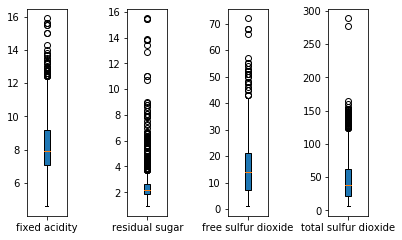

In [202]:
#Columnas con datos con alta varianza
figure,axes = plt.subplots(nrows=1, ncols=4)
figure.tight_layout(pad=3.0)

ax1 = axes[0]
ax1.boxplot(RedWine["fixed acidity"],vert=True,patch_artist=True,labels=["fixed acidity"])

ax2 = axes[1]
ax2.boxplot(RedWine["residual sugar"],vert=True,patch_artist=True,labels=["residual sugar"])

ax3 = axes[2]
ax3.boxplot(RedWine["free sulfur dioxide"],vert=True,patch_artist=True,labels=["free sulfur dioxide"])

ax4 = axes[3]
ax4.boxplot(RedWine["total sulfur dioxide"],vert=True,patch_artist=True,labels=["total sulfur dioxide"])

plt.show()

del ax1,ax2,ax3,ax4

Aplicando la teoria del limite central de la estadistica donde a partir de 30 observaciones en una poblacion se puede asumir que la poblacion se distibuye de forma normal, se hara la correccion para las variables expuestas previamente normalizando estas columnas

In [203]:
arreglos = pd.DataFrame(columns=["columna","media","std"],index=range(4))
arreglos

,columna,media,std
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [204]:
#Arreglo fixed acidity
arreglos.iloc[0] = ["fixed acidity",RedWine["fixed acidity"].mean(),RedWine["fixed acidity"].std()]
RedWine["fixed acidity"] = (RedWine["fixed acidity"]-arreglos.iloc[0]["media"])/arreglos.iloc[0]["std"]

In [205]:
#Arreglo residual sugar
arreglos.iloc[1] = ["residual sugar",RedWine["residual sugar"].mean(),RedWine["residual sugar"].std()]
RedWine["residual sugar"] = (RedWine["residual sugar"]-arreglos.iloc[1]["media"])/arreglos.iloc[1]["std"]

In [206]:
#Arreglo free sulfur dioxide
arreglos.iloc[2] = ["free sulfur dioxide",RedWine["free sulfur dioxide"].mean(),RedWine["free sulfur dioxide"].std()]
RedWine["free sulfur dioxide"] = (RedWine["free sulfur dioxide"]-arreglos.iloc[2]["media"])/arreglos.iloc[2]["std"]

In [207]:
#Arreglo total sulfur dioxide
arreglos.iloc[3] = ["total sulfur dioxide",RedWine["total sulfur dioxide"].mean(),RedWine["total sulfur dioxide"].std()]
RedWine["total sulfur dioxide"] = (RedWine["total sulfur dioxide"]-arreglos.iloc[3]["media"])/arreglos.iloc[3]["std"]

In [208]:
arreglos

,columna,media,std
0,fixed acidity,8.31964,1.7411
1,residual sugar,2.53881,1.40993
2,free sulfur dioxide,15.8749,10.4602
3,total sulfur dioxide,46.4678,32.8953


In [209]:
#Descripcion del dataset
print("Describe:")
RedWine.describe()

Describe:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1599.000000,1599.000000,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,-1.570643e-14,0.527821,0.270976,-1.344696e-15,0.087467,-7.724347e-17,1.619856e-16,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.000000e+00,0.179060,0.194801,1.000000e+00,0.047065,1.000000e+00,1.000000e+00,0.001887,0.154386,0.169507,1.065668,0.807569
min,-2.136377e+00,0.120000,0.000000,-1.162333e+00,0.012000,-1.422055e+00,-1.230199e+00,0.990070,2.740000,0.330000,8.400000,3.000000
25%,-7.004996e-01,0.390000,0.090000,-4.530767e-01,0.070000,-8.484502e-01,-7.438076e-01,0.995600,3.210000,0.550000,9.500000,5.000000
50%,-2.410190e-01,0.520000,0.260000,-2.402999e-01,0.079000,-1.792441e-01,-2.574163e-01,0.996750,3.310000,0.620000,10.200000,6.000000
75%,5.056370e-01,0.640000,0.420000,4.340257e-02,0.090000,4.899619e-01,4.721707e-01,0.997835,3.400000,0.730000,11.100000,6.000000
max,4.353787e+00,1.580000,1.000000,9.192806e+00,0.611000,5.365606e+00,7.372847e+00,1.003690,4.010000,2.000000,14.900000,8.000000


## 4.- Plot variable’s correlation 

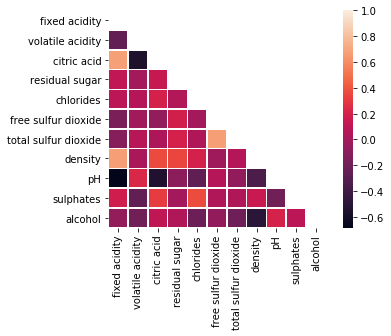

In [210]:
#Se obtine la matriz de correlacion entre las variables
corrMatrix = RedWine.drop("quality",axis=1).corr() 
#print(corrMatrix.round(2))

#Se obtiene una matriz de 0
mask = np.zeros_like(corrMatrix)
#Se obtiene un matriz con la pareja de posiciones del tirangulo superior y se le asigna el valor de True
mask[np.triu_indices_from(mask)] = True

#Se grafica la matriz de correlaciones,donde la matriz mask en las posiciones true no se grafican
ax = sns.heatmap(corrMatrix,mask=mask,square=True,linewidths=.5)

## 5.- Perform the logistic regression 

#### Set the independent variables (represented as X) and the dependent variable (represented as y) 

In [211]:
X = RedWine.drop("quality",axis=1)
y = RedWine["quality"]

#### Apply train_test_split setting the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, while the model training will be based on 75% of the dataset: 

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=0)

#### Apply the logistic regression 

In [213]:
#Apply the logistic regression 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
matrizClasificacion = pd.DataFrame.from_dict(classification_report(y_test, predictions,zero_division=1,output_dict=True)).transpose()
matrizClasificacion

,precision,recall,f1-score,support
3,1.000000,0.000000,0.000000,2.0000
4,1.000000,0.000000,0.000000,14.0000
5,0.664948,0.763314,0.710744,169.0000
6,0.598901,0.641176,0.619318,170.0000
7,0.458333,0.275000,0.343750,40.0000
8,1.000000,0.000000,0.000000,5.0000
accuracy,0.622500,0.622500,0.622500,0.6225
macro avg,0.787030,0.279915,0.278969,400.0000
weighted avg,0.633807,0.622500,0.597874,400.0000


##### Get the confusion Matrix 

In [215]:
from sklearn.metrics import confusion_matrix
matrixConfusion = pd.DataFrame(confusion_matrix(y_test, predictions))
matrixConfusion

,0,1,2,3,4,5
0,0,0,2,0,0,0
1,0,0,9,5,0,0
2,0,0,129,39,1,0
3,0,0,51,109,10,0
4,0,0,3,26,11,0
5,0,0,0,3,2,0


#### Print the accuracy

In [216]:
errors = abs(predictions - y_test)
# Display the performance metrics
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.49 %.


## 6.- Plot with matplotlib 

Con el grafico de la matriz de confusion se presenta a continuacion, se puede observar mas graficamente, el accuracy que tiene cada uno de los grupos de calidad. Donde se puede evidenciar que el recall de los grupos 5 y 6 de calidad son los mas asertados. Adicionalmente se puede observar que el set de pruebas no tomo un numero balenceado de registros para cada grupo.

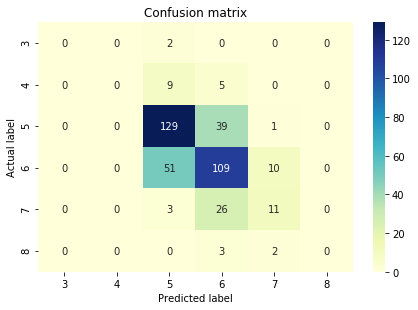

In [217]:
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(matrizClasificacion.index[0:6]))+0.5,matrizClasificacion.index[0:6])
plt.yticks(np.arange(len(matrizClasificacion.index[0:6]))+0.5,matrizClasificacion.index[0:6])
plt.show()

En el siguiente grafico, se puede observar la relacion que existe entre las caracteristicas y el grupo de calidad, donde a un mayor valor significa que hay una mayor relacion. En este caso, al momento de obtener un numero mayor de datos, se podria hacer un modelo obtimizado de tal forma que se tengan en cuenta las columnas con mayor importancia.

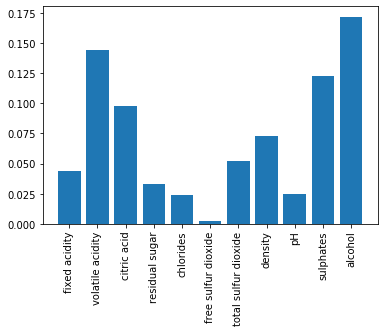

In [218]:
from sklearn.feature_selection import mutual_info_classif
mic = mutual_info_classif(X_train,y_train)
mic

posicion = np.arange(len(X_train.columns))
plt.bar(posicion,mic)
plt.xticks(posicion,X_train.columns,rotation='vertical')
plt.show()

## 7.- Check the prediction for a new dataset

### White Wine

In [219]:
#Load the dataset into a dataframe 
WhiteWine = pd.read_csv("../01. Flat Files/winequality-white.csv",sep=';')
#WhiteWine = pd.read_csv("../Datos/winequality-white.csv",sep=';')
#show the first 5 rows 
WhiteWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [220]:
print("Describe:")
print(WhiteWine.describe())
print("\n Shapes:")
print(WhiteWine.shape)
print("\n Nulls/NaN:")
print(WhiteWine.isna().any())
print("\n Dtypes:")
print(WhiteWine.dtypes)

Describe:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.00000

In [221]:
#Arreglo columnas de tal forma que se pueda utilizar el modelo realizado previamente en este data set
WhiteWine["fixed acidity"] = (WhiteWine["fixed acidity"]-arreglos.iloc[0]["media"])/arreglos.iloc[0]["std"]
WhiteWine["residual sugar"] = (WhiteWine["residual sugar"]-arreglos.iloc[1]["media"])/arreglos.iloc[1]["std"]
WhiteWine["free sulfur dioxide"] = (WhiteWine["free sulfur dioxide"]-arreglos.iloc[2]["media"])/arreglos.iloc[2]["std"]
WhiteWine["total sulfur dioxide"] = (WhiteWine["total sulfur dioxide"]-arreglos.iloc[3]["media"])/arreglos.iloc[3]["std"]

#### Correlacion

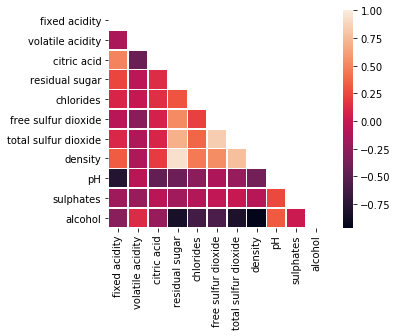

In [222]:
#Se obtine la matriz de correlacion entre las variables
corrMatrix2 = WhiteWine.drop("quality",axis=1).corr() .corr() 
#print(corrMatrix.round(2))

#Se obtiene una matriz de 0
mask2 = np.zeros_like(corrMatrix2)
#Se obtiene un matriz con la pareja de posiciones del tirangulo superior y se le asigna el valor de True
mask2[np.triu_indices_from(mask2)] = True

#Se grafica la matriz de correlaciones,donde la matriz mask en las posiciones true no se grafican
ax = sns.heatmap(corrMatrix2,mask=mask2,square=True,linewidths=.5)

### Se aplica el modelo del wino rojo en el data set de vino blanco

In [223]:
predictions = logmodel.predict(WhiteWine.drop("quality",axis=1))
matrizClasificacion = pd.DataFrame.from_dict(classification_report(WhiteWine["quality"], predictions,zero_division=1,output_dict=True)).transpose()
matrizClasificacion

,precision,recall,f1-score,support
3,1.000000,0.000000,0.000000,20.000000
4,1.000000,0.000000,0.000000,163.000000
5,0.390459,0.910089,0.546466,1457.000000
6,0.461707,0.287989,0.354721,2198.000000
7,0.480916,0.071591,0.124629,880.000000
8,1.000000,0.000000,0.000000,175.000000
9,1.000000,0.000000,0.000000,5.000000
accuracy,0.412822,0.412822,0.412822,0.412822
macro avg,0.761869,0.181381,0.146545,4898.000000
weighted avg,0.483858,0.412822,0.344131,4898.000000


In [224]:
matrixConfusion = pd.DataFrame(confusion_matrix(WhiteWine["quality"], predictions))
matrixConfusion

,0,1,2,3,4,5,6
0,0,0,16,4,0,0,0
1,0,0,137,24,2,0,0
2,0,0,1326,125,6,0,0
3,0,0,1519,633,46,0,0
4,0,0,340,477,63,0,0
5,0,0,57,104,14,0,0
6,0,0,1,4,0,0,0


In [225]:
errors = abs(predictions - WhiteWine["quality"])
# Display the performance metrics
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.6 %.


## Plot

## 8.- Explain the results 

En los siguientes graficos, se puede evidenciar que el modelo de regresion logistica aplicado para los vinos rojos tambien es funcional para los vinos blancos, sobre todo cuando estos son de clase 4,5,6

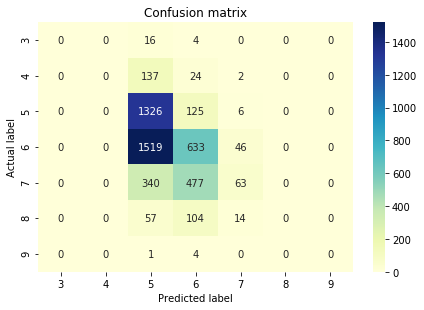

In [226]:
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(matrizClasificacion.index[0:7]))+0.5,matrizClasificacion.index[0:7])
plt.yticks(np.arange(len(matrizClasificacion.index[0:7]))+0.5,matrizClasificacion.index[0:7])
plt.show()

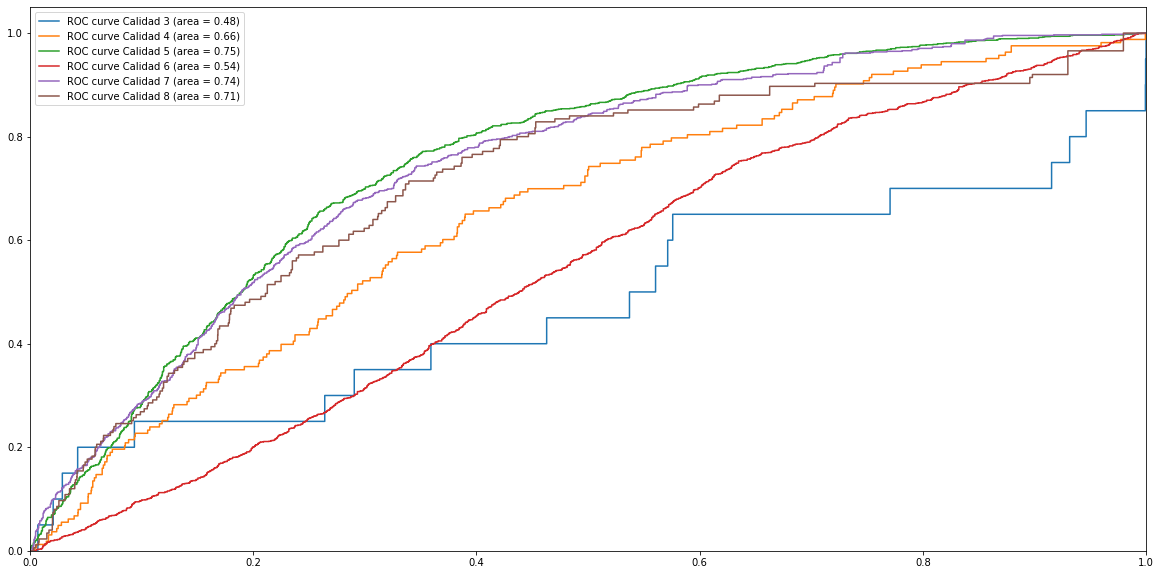

In [227]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
x = WhiteWine.drop("quality",axis=1)
y = WhiteWine["quality"]
y = label_binarize(y, classes=[3,4,5,6,7,8])
n_classes = y.shape[1]

classifier = OneVsRestClassifier(logmodel)
classifier.fit(RedWine.drop("quality",axis=1),RedWine["quality"])
y_score = classifier.decision_function(x)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i+3], tpr[i+3], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i+3] = auc(fpr[i+3], tpr[i+3])

plt.figure(figsize=(20,10))

plt.plot(fpr[3], tpr[3],label='ROC curve Calidad 3 (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],label='ROC curve Calidad 4 (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],label='ROC curve Calidad 5 (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6],label='ROC curve Calidad 6 (area = %0.2f)' % roc_auc[6])
plt.plot(fpr[7], tpr[7],label='ROC curve Calidad 7 (area = %0.2f)' % roc_auc[7])
plt.plot(fpr[8], tpr[8],label='ROC curve Calidad 8 (area = %0.2f)' % roc_auc[8])
plt.legend(loc='best')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()